#### The SIR (Susceptible-Infected-Recovered) model is a set of differential equations used to describe the spread of infectious diseases within a population. Given the parameters, here is the SIR model.

dS/dt = -β(SI/N)
dI/dt = -β(SI/N)-γI
 dR/dt = γI
 
Where:
 - Beta (β): infection rate
 - Gamma (γ): recovery rate
 - N = total population




In [14]:
#importing libraries

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [15]:
# Define the SIR model

def dAdt(y, t, beta, gamma, N):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return [dSdt, dIdt, dRdt]
    

#### Solving the model equation that are parameters describing the situation of Corona virus infection in China, mainly focusing on Wuhan City, on Januray 22, 2020.

- gamma = 1/10 (recovery rate)
- beta = 0.39  (infection rate)
- N = 1.1 * 10**7  (total population)

#### Initial conditions
- S0 = N - 574
- I0 = 574
- R0 = 0
- y0 = [S0, I0, R0]  (initial conditions vector)



In [19]:
# Initial Condition

S0 = N - 574
I0 = 574
R0 = 0
y0 = [S0, I0, R0]  #initial conditions vector

In [20]:
# Time points

times = np.linspace(0, 160, 160)  # days

# Solve the differential equations
sol = odeint(dAdt, y0, times, args=(beta, gamma, N))

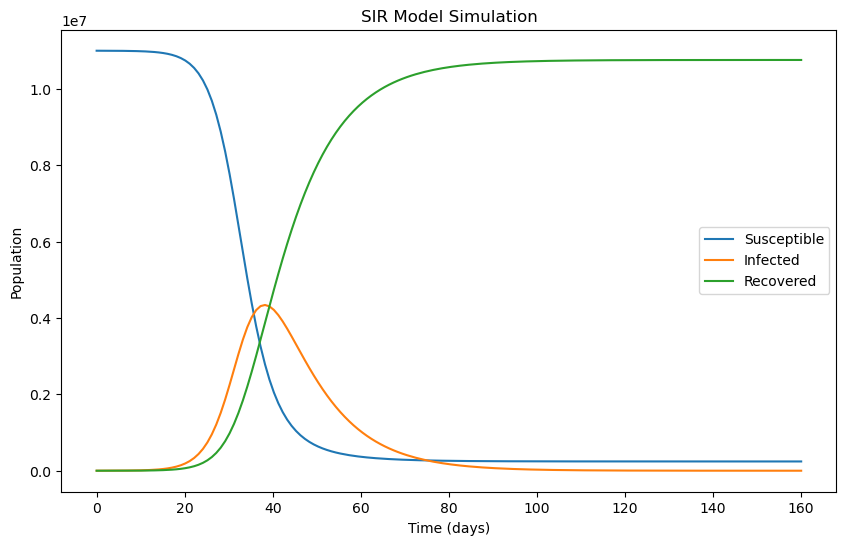

In [25]:
# Extract results
S, I, R = sol.T

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(times, S, label='Susceptible')
plt.plot(times, I, label='Infected')
plt.plot(times, R, label='Recovered')
plt.xlabel('Time (days)')
plt.ylabel('Population')
plt.legend()
plt.title('SIR Model Simulation')
plt.show()